# stdatmus_z2tdp

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Disclaimer</p>
    This package is not endorsed by NSF NCAR. This package is suggested "as-is" for a potential solution in an effort to offer continued support for the transition from NCL To Python. This page is subject to change, but the output has been verified and differences are listed below.
</div>

## Overview
Calculates the corresponding temperature, density, and pressure based height
- NCL [stdatmus_z2tdp](https://www.ncl.ucar.edu/Document/Functions/Built-in/stdatmus_z2tdp.shtml)

## [Ambiance](https://github.com/airinnova/ambiance/) Python Package

`ambiance` atmosphere properties that match the NCL `stdatmus_z2tdp` function
- Density (`density`)
- Pressure (`pressure`)
- Temperature (`temperature_in_celsius`)

## stdatmus_z2tdp

### Grab and Go

In [92]:
from ambiance import Atmosphere

height = 100  # meters
stdatmus_100 = Atmosphere(height)

print(f"Temperature : {stdatmus_100.temperature_in_celsius[0]} C")
print(f"Density     : {stdatmus_100.density[0]} kg/m^3")
print(f"Pressure    : {stdatmus_100.pressure[0]/100} hPa (mB)")

Temperature : 14.350010225164397 C
Density     : 1.213282967332296 kg/m^3
Pressure    : 1001.2945645595289 hPa (mB)


## Python changes to approximate NCL functionality
The `ambiance` package includes additional atmospheric properties as well as the NCL properties (`temperature_in_celsius`,  `density`,`pressure`), including:
- Collision frequency (`collision_frequency`)
- Dynamic viscosity (`dynamic_viscosity`)
- Geometric height above [mean sea-level](https://en.wikipedia.org/wiki/Sea_level) (`h`)
- Geopotential height (`H`)
- Gravitational acceleration (`grav_accel`)
- Kinematic viscosity (`kinematic_viscosity`)
- Layer names (`layer_name`)
- Mean free path (`mean_free_path`)
- Mean particle speed (`mean_particle_speed`)
- Number density (`number_density`)
- Pressure scale height (`pressure_scale_height`)
- Specific weight (`specific_weight`)
- Speed of sound (`speed_of_sound`)
- Temperature (`temperature`)
- Thermal conductivity (`thermal_conductivity`)

### Differences from NCL

To match NCL functionality, the default `pressure` property needs to be converted from the `ambiance` default `Pascal` unit to NCL's `Millibar` (dividing by 100).

```
stdatmus_z2tdp Millibar unit = ambiance Pascal unit / 100
```

Also, while the `stdatmus_z2tdp` NCL function is based on the 1976 U.S. standard atmosphere model, `ambiance` is an implementation of [1993 ICAO Standard Atmosphere](https://ambiance.readthedocs.io/en/latest/theory/references.html). The [U.S Standard Atmosphere model](https://en.wikipedia.org/wiki/U.S._Standard_Atmosphere) is largely consistent with the International Standard Atmosphere model with discrepancies in temperatures at higher altitudes. 

### Compare NCL to `ambiance` values

In [93]:
# Collect NCL values for stdatmus_z2tdp from 0 to 80000
import numpy as np

tdp_data = np.loadtxt("data/stdatmus_z2tdp_output.txt", skiprows=5)
ncl_temperature = tdp_data[
    ::3
]  # temperature first element, every third element in list
ncl_density = tdp_data[1::3]  # density second element, every third element in list
ncl_pressure = tdp_data[2::3]  # pressure third element, every third element in list

In [94]:
# Collect Python values from ambiance
from ambiance import Atmosphere
import numpy as np

ambiance_density = []
ambiance_pressure = []
ambiance_temperature = []

for height in np.arange(0, len(ncl_temperature)):
    atmos = Atmosphere(height)
    ambiance_density.append(atmos.density[0])
    ambiance_pressure.append(atmos.pressure[0] / 100)  # convert to Millibar
    ambiance_temperature.append(atmos.temperature_in_celsius[0])

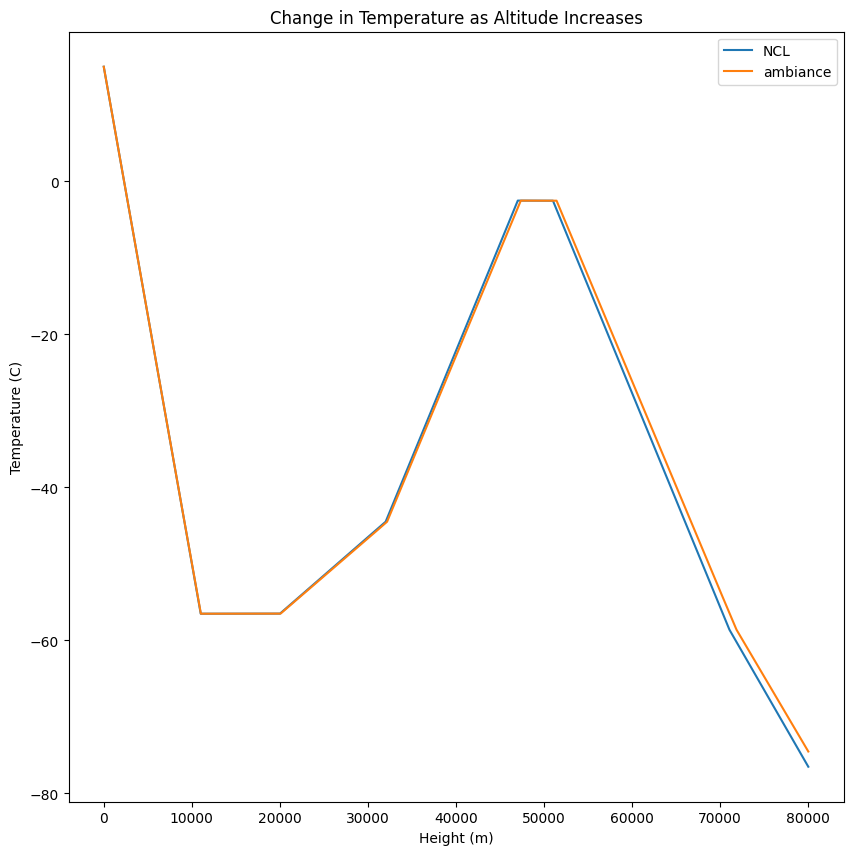

In [95]:
### Compare Temperature
import matplotlib.pyplot as plt

height_range = np.arange(0, len(ncl_temperature))

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Change in Temperature as Altitude Increases")
plt.xlabel("Height (m)")
plt.ylabel("Temperature (C)")
plt.plot(height_range, ncl_temperature, label="NCL")
plt.plot(height_range, ambiance_temperature, label="ambiance")
plt.legend()
plt.show()

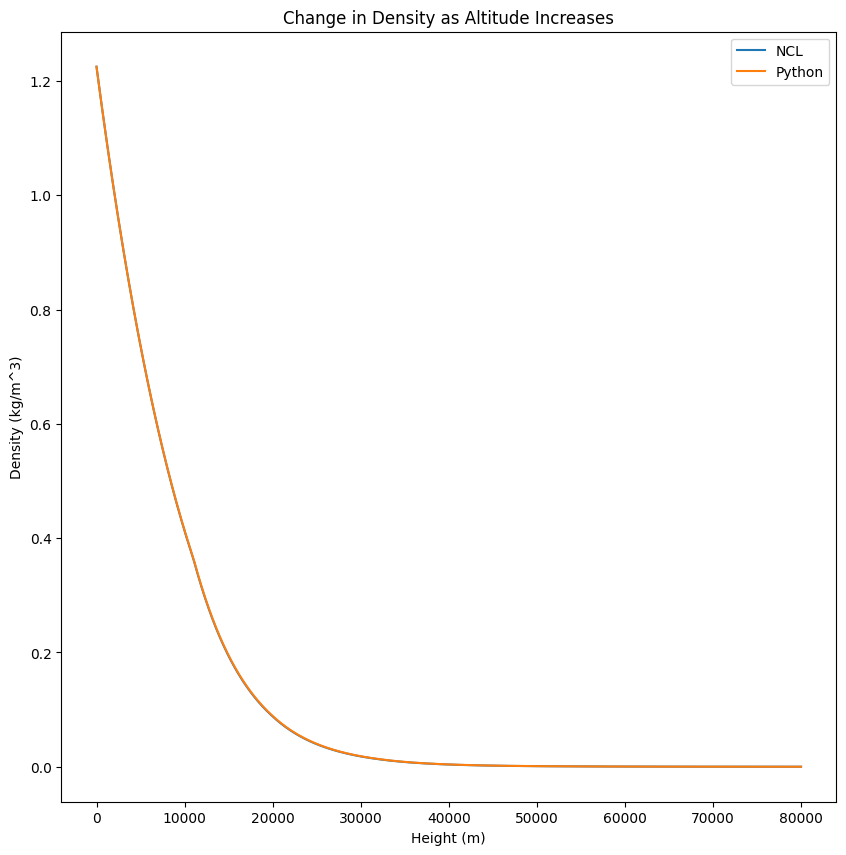

In [96]:
### Compare Density
import matplotlib.pyplot as plt

height_range = np.arange(0, len(ncl_density))

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Change in Density as Altitude Increases")
plt.xlabel("Height (m)")
plt.ylabel("Density (kg/m^3)")
plt.plot(height_range, ncl_density, label="NCL")
plt.plot(height_range, ambiance_density, label="Python")
plt.legend()
plt.show()

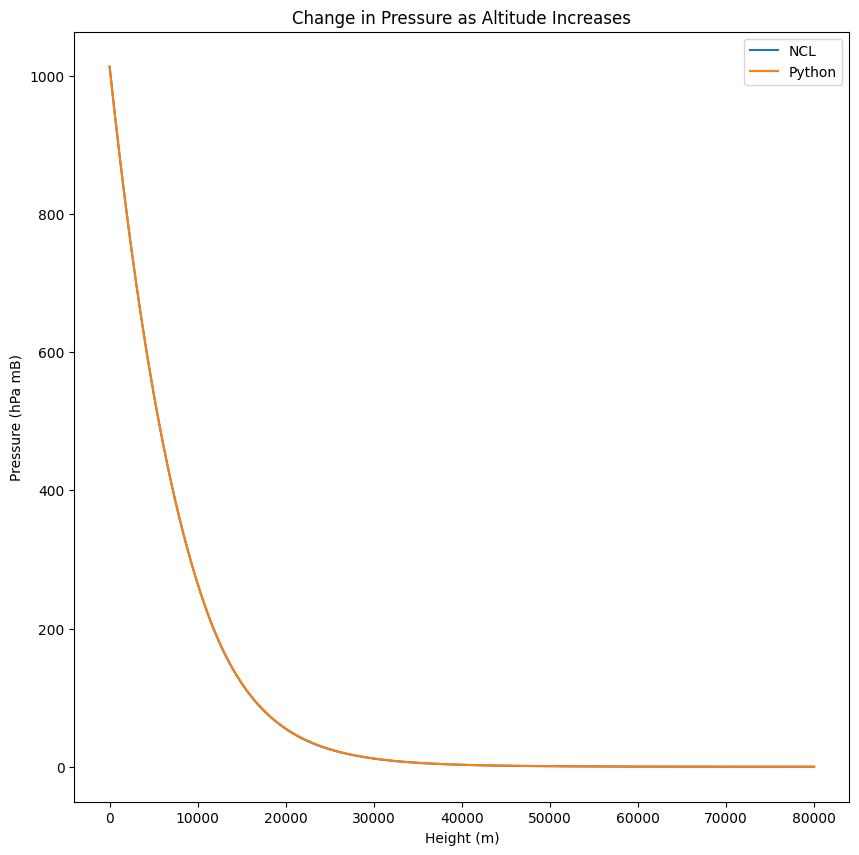

In [97]:
### Compare Pressure
import matplotlib.pyplot as plt

height_range = np.arange(0, len(ncl_pressure))

fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Change in Pressure as Altitude Increases")
plt.xlabel("Height (m)")
plt.ylabel("Pressure (hPa mB)")
plt.plot(height_range, ncl_pressure, label="NCL")
plt.plot(height_range, ambiance_pressure, label="Python")
plt.legend()
plt.show()

## Python Resources

- Python [`ambiance` documentation](https://ambiance.readthedocs.io/en/latest/)
- [1976 U.S. standard atmosphere](https://www.ngdc.noaa.gov/stp/space-weather/online-publications/miscellaneous/us-standard-atmosphere-1976/us-standard-atmosphere_st76-1562_noaa.pdf) documentation
- [U.S Standard Atmosphere Model (Wikipedia)](https://en.wikipedia.org/wiki/U.S._Standard_Atmosphere)
- [International Standard Atmosphere (Wikipedia)](https://en.wikipedia.org/wiki/International_Standard_Atmosphere)